<a href="https://colab.research.google.com/github/SantosCristiano/artificial-intelligence-python/blob/main/tensorflow01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 1

## Se quiser descomentar e rodar, selecione as linhas comentadas e tecle: 'ctrl' e ';'

In [ ]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# msg = tf.constant('Hello, TensorFlow!')
# sess = tf.Session()
# print(sess.run(msg).decode("utf-8"))

## Multiplicação de dois tensores

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

a = tf.constant([ [1.0, 2.0], [3.0, 4.0] ])
b = tf.constant([ [5.0, 6.0], [7.0, 8.0] ])
c = tf.matmul(a,b)

sess = tf.Session()
print(sess.run(c))


Instructions for updating:
non-resource variables are not supported in the long term


[[19. 22.]
 [43. 50.]]


Cria o tensor 'a', mas, sem valores, só com o placeholder.
<br />Ao 'b' é atribuído o resultado da multiplicação de 'a' com ele mesmo.

In [2]:
a = tf.compat.v1.placeholder(tf.compat.v1.float32 , shape=(3,3))
b = tf.compat.v1.matmul(a, a)
rand_array = np.random.rand(3,3)
sess = tf.Session()
result = sess.run(b, feed_dict={a: rand_array})
print(result)

[[1.5034088  0.783246   0.79511887]
 [1.3223238  0.9900415  0.8800246 ]
 [0.702577   0.44943509 0.6826613 ]]


# Plotando os dados

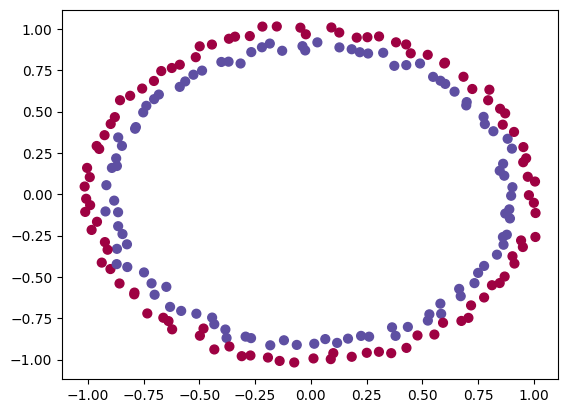

In [3]:
import matplotlib.pyplot as plt
import sklearn.datasets

#Setando o seed para gerar sempre a mesma coisa
tf.set_random_seed(2)
np.random.seed(2)

#gerando o dataset
dataset_X , dataset_Y = sklearn.datasets.make_circles(n_samples=200, shuffle=True, noise=0.02, random_state=7, factor=0.9)
#plotando o dataset
plt.scatter(dataset_X[:,0], dataset_X[:,1], s=40, c=dataset_Y, cmap=plt.cm.Spectral)

# Função que constroi a rede neural

A função **build_net()** recebe como parâmetro a quantidade de features e classes usadas
no problema, neste caso, tanto a quantidade de features quanto a de classes são
iguais a 2.

In [4]:
def build_net(n_features , n_classes):
  # Placeholders
  # shape=[None] indica que o batch pode ser de qualquer tamanho
  X_placeholder = tf.placeholder(dtype=tf.float32 , shape=[None , n_features])
  Y_placeholder = tf.placeholder(dtype=tf.int64 , shape=[None])
  # X_placeholder é camada de entrada da rede
  # Y_placeholder é o vetor que contém os labels do dataset
  # eles serão utilizados para comparação com a saída da rede.

  #camada oculta
  #O segundo argumento (100) é o número de neurônios / nós da camada.
  layer1 = tf.layers.dense(X_placeholder , 100, activation=tf.nn.relu)
  # relu é a função não linear, para que a rede não fique travada
  # ao tentar realizar a regressão linear em um problema não linear

  #camada de saída
  out = tf.layers.dense(layer1 , n_classes , name="output")

  #adaptando o vetor Y para o modelo One−Hot Label
  one_hot = tf.one_hot(Y_placeholder , depth=n_classes)
  # O vetor de labels, o Y_placeholder, é convertido para o formato OneHot
  # (por exemplo,  a label 0 se torna o vetor [1,0] e o label 1 se torna
  # o vetor [0,1]), dessa forma é possível a comparação com a saída da rede.

  #função de perda/custo/erro
  loss = tf.losses.softmax_cross_entropy(onehot_labels=one_hot , logits=out)
  # a função Entropia Cruzada é usada em conjunto com uma camada softmax
  # logits são os valores a serem usados ​​como entrada para softmax
  # Logit é uma função que mapeia probabilidades [0, 1]para [-inf, +inf].
  # Softmax é uma função que mapeia [-inf, +inf] para [0, 1] semelhante à sigmóide.
  # Estamos aplicando a função softmax aos números logit para normalizá-los.

  #otimizador
  opt = tf.train.GradientDescentOptimizer(learning_rate =0.07). minimize(loss)
  # quanto menor o learning_rate mais demorado

  #classe do exemplo
  softmax = tf.nn.softmax(out)
  # Retorna um tensor, tem o mesmo tipo e formato dos logits (out), ele apenas
  # normaliza os valores.
  # As saídas do softmax podem ser interpretadas como probabilidades.
  # Levanta um InvalidArgumentError se os logits estiverem vazios ou
  # o eixo estiver além da última dimensão dos logits.


  class_ = tf.argmax(softmax, axis=1)
  # tensores que classificam um exemplo de entrada da rede
  # argmax retorna o índice com o maior valor entre os eixos de um tensor
  # axis: 0 significa coluna por coluna, 1 significa linha por linha

  # Acurácia
  # tensores que calculam a acurácia da rede
  compare_prediction = tf.equal(class_ , Y_placeholder)
  # equal retorna o valor true de (x == y).
  accuracy = tf.reduce_mean(tf.cast(compare_prediction , tf.float32))
  # reduce_mean calcula a média dos elementos nas dimensões de um tensor.

  return X_placeholder , Y_placeholder , loss , opt, class_ , accuracy



# Inicia a sessão, obtem o número de features e carrega o modelo

In [ ]:
#iniciando a sessão
sess = tf.InteractiveSession()
#numero de classes do problema
num_classes = 2
#obtendo o número de features
n_features = dataset_X.shape[1]

#carregando o modelo
X_placeholder , Y_placeholder , loss , opt, class_ , accuracy = build_net(n_features, num_classes)
#inicializando as variáveis
sess.run(tf.global_variables_initializer())

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


# Função para desenhar o separador

In [ ]:
def draw_separator(X, Y, sess, X_placeholder, class_):
    x_min, x_max = X[:, 0].min() - 0.3 , X[:, 0].max() + 0.3
    # pega todos da primeira coluna(0)
    # defina os valores mínimo e máximo e fornece algum espaçamento

    y_min, y_max = X[:, 1].min() - 0.3 , X[:, 1].max() + 0.3
    # pega todos da segunda coluna(1)

    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    # class_ são as classes retornadas pela argmax
    Z = sess.run(class_, feed_dict={X_placeholder:np.c_[xx.ravel(), yy.ravel()] })

    # Coloca o resultado em um gráfico de cores
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.axis('on')

    # Plota também os pontos de treinamento
    plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.Spectral)


# Define o número de épocas
Treinamento da rede, um laço executa o treinamento da rede mil vezes (mil épocas) usando todo o dataset.

## Obs.
Como o tamanho do dataset, neste exemplo, é pequeno, o método de dividir o dataset em lotes não é usado.

O erro na epoca 0 : 0.6547767
O erro na epoca 100 : 0.6486947
O erro na epoca 200 : 0.6426584
O erro na epoca 300 : 0.63658655
O erro na epoca 400 : 0.63007826
O erro na epoca 500 : 0.62275076
O erro na epoca 600 : 0.6153163
O erro na epoca 700 : 0.60744095
O erro na epoca 800 : 0.599036
O erro na epoca 900 : 0.5901065
accuracia do modelo: 0.975
a classe do ponto [[ 0.67559685 -0.76571585]] e: [0]


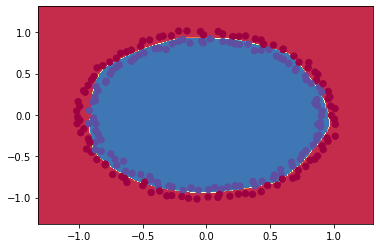

In [ ]:
#definindo o numero de épocas
epochs = 1000
for i in range(epochs):
  #treinamento (OBS: mini−batch não usado por causa do tamanho pequeno do dataset)
  sess.run(opt, feed_dict={X_placeholder: dataset_X , Y_placeholder: dataset_Y})

  #a cada 100 épocas o erro é impresso
  if i % 100 == 0:
    erro_train = sess.run(loss , feed_dict={X_placeholder: dataset_X, Y_placeholder: dataset_Y})
    print("O erro na epoca", i,":", erro_train)

# calculando a acurácia
acc = sess.run(accuracy , feed_dict={X_placeholder: dataset_X, Y_placeholder: dataset_Y})
print("accuracia do modelo:", acc)
# O feed_dict define um valor para o tensor
cla = sess.run(class_ , feed_dict={X_placeholder: dataset_X[:1]})
print("a classe do ponto", dataset_X[:1], "e:", cla)

# desenhando o separador
draw_separator(dataset_X , dataset_Y , sess , X_placeholder , class_)